In [2]:
library(OasisR)
library(tidyverse)
library(ggplot2)

Warning message:
"package 'OasisR' was built under R version 3.6.2"Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
# get cbsa
df <- foreign::read.dta('hw02_ltdb_2010.dta')
cbsa <- df[which(df$cbsaname == 'San Francisco-Oakland-Fremont, CA CBSA'),]

## Question 1

In [4]:
# population by sum of race columns 
tot_pop <- cbsa %>% 
    select(nwhite, nblack, nhisp, nasian) %>%
    sum()

# race proportions
pr_wh <- sum(cbsa$nwhite) / tot_pop
pr_bl <- sum(cbsa$nblack) / tot_pop
pr_hp <- sum(cbsa$nhisp) / tot_pop
pr_as <- sum(cbsa$nasian) / tot_pop

# use custom denominator
tot_pov <- sum(cbsa$povyes, cbsa$povno)
pr_pov <- sum(cbsa$povyes) / tot_pov

# single parenthood rate
tot_phood <- cbsa %>% 
    select(nokids, twoparent, singparent) %>%
    sum()
pr_singparent <- sum(cbsa$singparent)/tot_phood

# 25+ with HS degree
# data splits age at 18, not 25
tot_18plus <- sum(cbsa$age1859, cbsa$age60up)
pr_lowed <- sum(cbsa$edlow) / tot_18plus

**Table 1:** San Fransisco Area CBSA Population Characteristics

|                    |           |
| ------------------ | --------- |
| Total Population   | 4,209,664 |
|                    |           |
| Prop. White        | 0.437     | 
| Prop. Black        | 0.093     | 
| Prop. Hispanic     | 0.223     | 
| Prop. Asian        | 0.246     |
|                    |           |
| Poverty Rate       | 0.099     |
| Single Parent      | 0.088     |
| 18+ No HS          | 0.111     |

In [5]:
# number of neighbourhoods
num_hoods <- length(unique(cbsa$tract))

# race proportion neighborhood tract sample characteristics
cbsa$race_pop <- (cbsa$nwhite + cbsa$nblack + cbsa$nasian + cbsa$nhisp)

cbsa$pr_white <- cbsa$nwhite / cbsa$race_pop
cbsa$pr_black <- cbsa$nblack / cbsa$race_pop
cbsa$pr_hisp <- cbsa$nhisp / cbsa$race_pop
cbsa$pr_asian <- cbsa$nasian / cbsa$race_pop

m_pr_white <- mean(cbsa$pr_white, na.rm = TRUE)
sd_pr_white <- sd(cbsa$pr_white, na.rm = TRUE)
quantiles_pr_white <- quantile(cbsa$pr_white, na.rm = TRUE)

m_pr_black <- mean(cbsa$pr_black, na.rm = TRUE)
sd_pr_black <- sd(cbsa$pr_black, na.rm = TRUE)
quantiles_pr_black <- quantile(cbsa$pr_black, na.rm = TRUE)

m_pr_hisp <- mean(cbsa$pr_hisp, na.rm = TRUE)
sd_pr_hisp <- sd(cbsa$pr_hisp, na.rm = TRUE)
quantiles_pr_hisp <- quantile(cbsa$pr_hisp, na.rm = TRUE)

m_pr_as <- mean(cbsa$pr_as, na.rm = TRUE)
sd_pr_as <- sd(cbsa$pr_as, na.rm = TRUE)
quantiles_pr_as <- quantile(cbsa$pr_as, na.rm = TRUE)

# other measures tract-level sample characteristics
cbsa$pov_pop <- cbsa$povyes + cbsa$povno
cbsa$pr_pov <- cbsa$povyes / cbsa$pov_pop
m_pr_pov <- mean(cbsa$pr_pov, na.rm = TRUE)
sd_pr_pov <- sd(cbsa$pr_pov, na.rm = TRUE)
quantiles_pr_pov <- quantile(cbsa$pr_pov, na.rm = TRUE)

cbsa$singpar_pop <- cbsa$singparent + cbsa$nokids + cbsa$twoparent
cbsa$pr_singpar <- cbsa$singparent / cbsa$singpar_pop
m_pr_singpar <- mean(cbsa$pr_singpar, na.rm = TRUE)
sd_pr_singpar <- sd(cbsa$pr_singpar, na.rm = TRUE)
quantiles_pr_singpar <- quantile(cbsa$pr_singpar, na.rm = TRUE)

cbsa$age_pop <- cbsa$age1859 + cbsa$age60up
cbsa$pr_adult_nohs <- cbsa$edlow / cbsa$age_pop
m_pr_adult_nohs <- mean(cbsa$pr_adult_nohs, na.rm = TRUE)
sd_pr_adult_nohs <- sd(cbsa$pr_adult_nohs, na.rm = TRUE)
quantiles_pr_adult_nohs <- quantile(cbsa$pr_adult_nohs, na.rm = TRUE)

**Table 2:** San Fransisco Neighborhood Characteristics  

|                         |                   |                   | ||||
|-------------------------|-------------------|-------------------| ||||
| *Number of neighborhoods*|                   |     Count | ||||
|                           |                   |    980          | ||||
|                         |                   |                   | ||||
| *Neighborhood Proportions*  |                   |  Mean (SD)    | ||||
|                         | White             |   .45 (.25)       | ||||
|                         | Black             |    .19   (.12)    | | |||
|                         | Hispanic          |    .21 (.17)      | ||||
|                         | Asian             |      .24 (.18)    | ||||
|                         |                   |                   | ||||
|                         | Poverty           |     .10 (.09)     | ||||
|                         | Single Parenthood |      .09 (.07)    | ||||
|                         | 18+ No High School|       .11 (.10)   | ||||
|                         |                   |                   | ||||
| *Neighborhood Quantiles*|                   |          Min      |  25% | Median | 75% | max |
|                         | White             |         .02       |  .23 | .45    |  .68| .94 |
|                         | Black             |          .00      | .02 | .04|.13|.70|
|                         | Hispanic          |         .01       |.08|.15|.28|.91|
|                         | Asian             |                .01|.10|.17|.35|.90|
|                         |                   |                | ||||
|                         | Poverty           |               .00 |.04 |.07|.14|.65|   
|                         | Single Parenthood |        .00        |.04 |.07|.12|.50|
|                         | 18+ No High School|           .00     |.03 |.08|.16|.57|


In [6]:
race_subset <- cbsa %>% select(nwhite, nblack, nasian, nhisp)
race_exposure <- xPy(as.matrix(race_subset), exact = T)
pov_subset <- cbsa %>% select(povno, povyes)
pov_exposure <- xPy(as.matrix(pov_subset), exact = T)
par_subset <- cbsa %>% select(nokids, twoparent, singparent)
par_exposure <- xPy(as.matrix(par_subset), exact = T)
cbsa$hsplus <- cbsa$edhs + cbsa$edsome + cbsa$edba

ed_subset <- cbsa %>% select(edlow, hsplus)
ed_exposure <- xPy(as.matrix(ed_subset), exact = T)

Warning message in segdataclean(x):
"following lines were deleted because of null population: 112, 335, 524, 574, 712, 775, 783"Warning message in segdataclean(x):
"following lines were deleted because of null population: 112, 335, 524, 564, 574, 712, 775, 783"Warning message in segdataclean(x):
"following lines were deleted because of null population: 112, 335, 524, 564, 574, 712, 775, 783"Warning message in segdataclean(x):
"following lines were deleted because of null population: 112, 335, 524, 574, 712, 775, 783"

**Table 3:** San Fransisco CBSA Exposure Indices

| Comparison | Demominator | Exposure Value | 
|------------|-------------|----------------|
| White - Black | White, Black Asian, Hispanic | 0.06 |
| White - Asian | White, Black Asian, Hispanic | 0.20 |
| White - Hispanic | White, Black Asian, Hispanic | 0.16 |
|                  |                              |      |
| Poor - Non-poor  |  Poor, Non-Poor              | 0.09 |
| One Parent - Two Parent | One Parent, Two Parent, No Kids | 0.23  |
|     High School or More - Low Educated| Low Educated, Sum of Higher Ed| 0.11  |

## Question 2

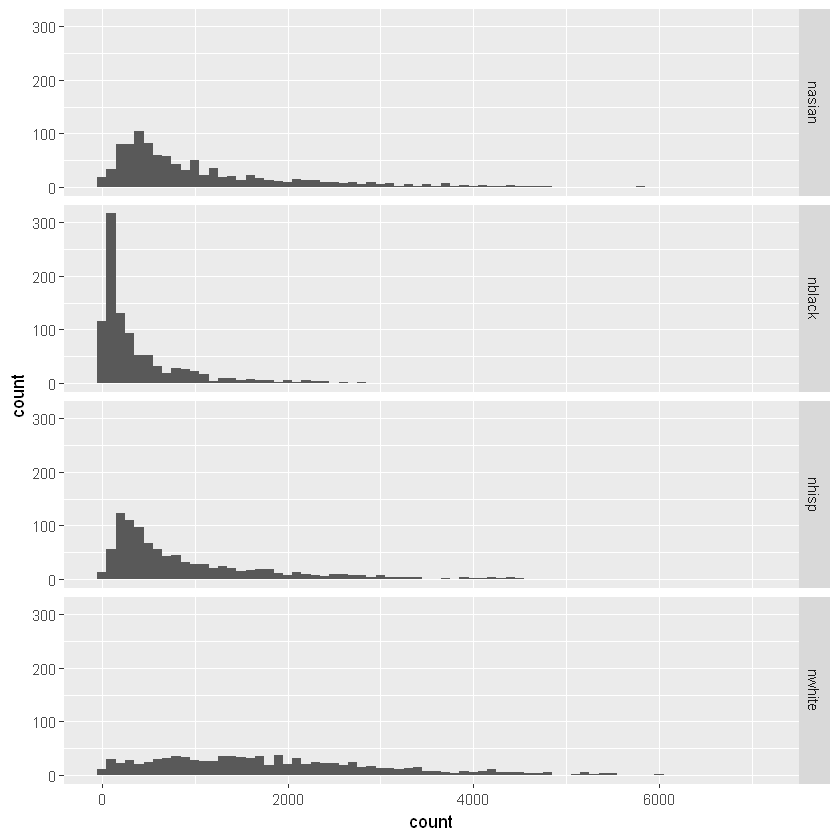

In [9]:
cbsa_long <- cbsa %>% gather(key='ethnicity', value='count', nwhite, nblack, nasian, nhisp)

ggplot(data = cbsa_long, aes(count)) +
    geom_histogram(binwidth = 100) +
    facet_grid(ethnicity~.)

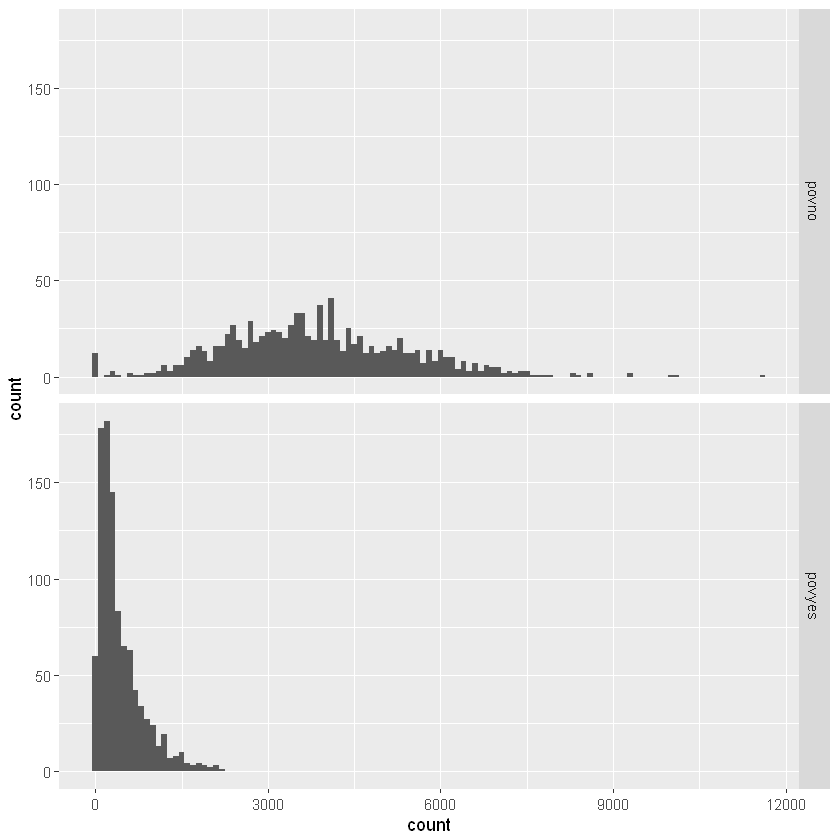

In [7]:
cbsa_long2 <- cbsa %>% gather(key='pov_status', value='count', povno, povyes)

ggplot(data = cbsa_long2, aes(count)) +
    geom_histogram(binwidth = 100) +
    facet_grid(pov_status~.)

In [14]:
write_csv(cbsa, 'cbsa_sf.csv')

ERROR: Error in library(xlsx): there is no package called 'xlsx'


## Question 3

This step had me stuck for a while. The R environment I'm working in doesn't have a .xls writer installed, so I wrote my cbsa dataframe to CSV. In doing so, I lost the leading zeros from the tract variable and the tract variable was converted to a numeric type. Took me a while to identify these issues to get the join working in Arcmap. After that, things went pretty quickly.  

## Question 4

#### Map 1

For the first map I just mapped proportion of blacks in each tract. I set the categories to quantile. I don't love the quantiles because the 75-100 range contains values of proportion blacks from as low as 15%. Still, the resulting map is interesting, so see that regions with proportionally more black people tend to be clustered in the more dense central areas. This fits the common intuition/stereotype that I might have expected. In retrospect I wish I could have picked a CBSA about which I had more direct knowledge, as it could have led me to make more interesting maps. Unfortunately I don't really have much direct knowledge of any US regions.  

   ![map1](arcmap/m1.png)

#### Map 2

For the second plot I mapped poverty rates into ten quantile-based categories. At first I tried to use equal intervals, but this, interestingly, made almost the entire map look white-pink, i.e. not very poor. In some ways, equal intervals provide a more realistic sense of the conditions of the CBSA. When I use quantiles, I am essentially forcing some proportion of tracts to appear dark, or look very poor. In fact, these dark segments range in poverty rates from 22 - 65%. Probably the most honest and informative map would use some theoretically meaningful cutoff and simply map tracts as being within or beyond that cutoff.

   ![map2](arcmap/m2.png)
